In [ ]:
!pip install torch numpy matplotlib torchvision

In [2]:
from torch.utils.data import DataLoader
import torchvision.datasets as Dataset
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [47]:
!pwd

/content


In [5]:
import os

animal_dir = "/content/drive/MyDrive/animals/animals"

if os.path.exists(animal_dir):
  print("Dataset exists!")
else:
  print("error!!")

Dataset exists!


In [6]:
class_map = {i:animal for i,animal in enumerate(sorted(os.listdir(animal_dir)))}
class_map

{0: 'boar',
 1: 'cat',
 2: 'cow',
 3: 'deer',
 4: 'dog',
 5: 'elephant',
 6: 'fox',
 7: 'goat',
 8: 'horse',
 9: 'leopard',
 10: 'lion',
 11: 'tiger'}

In [7]:
train_dataset = Dataset.ImageFolder(root=animal_dir,transform=transform)


In [8]:
batch_size = 60
trainloader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True,num_workers=0)


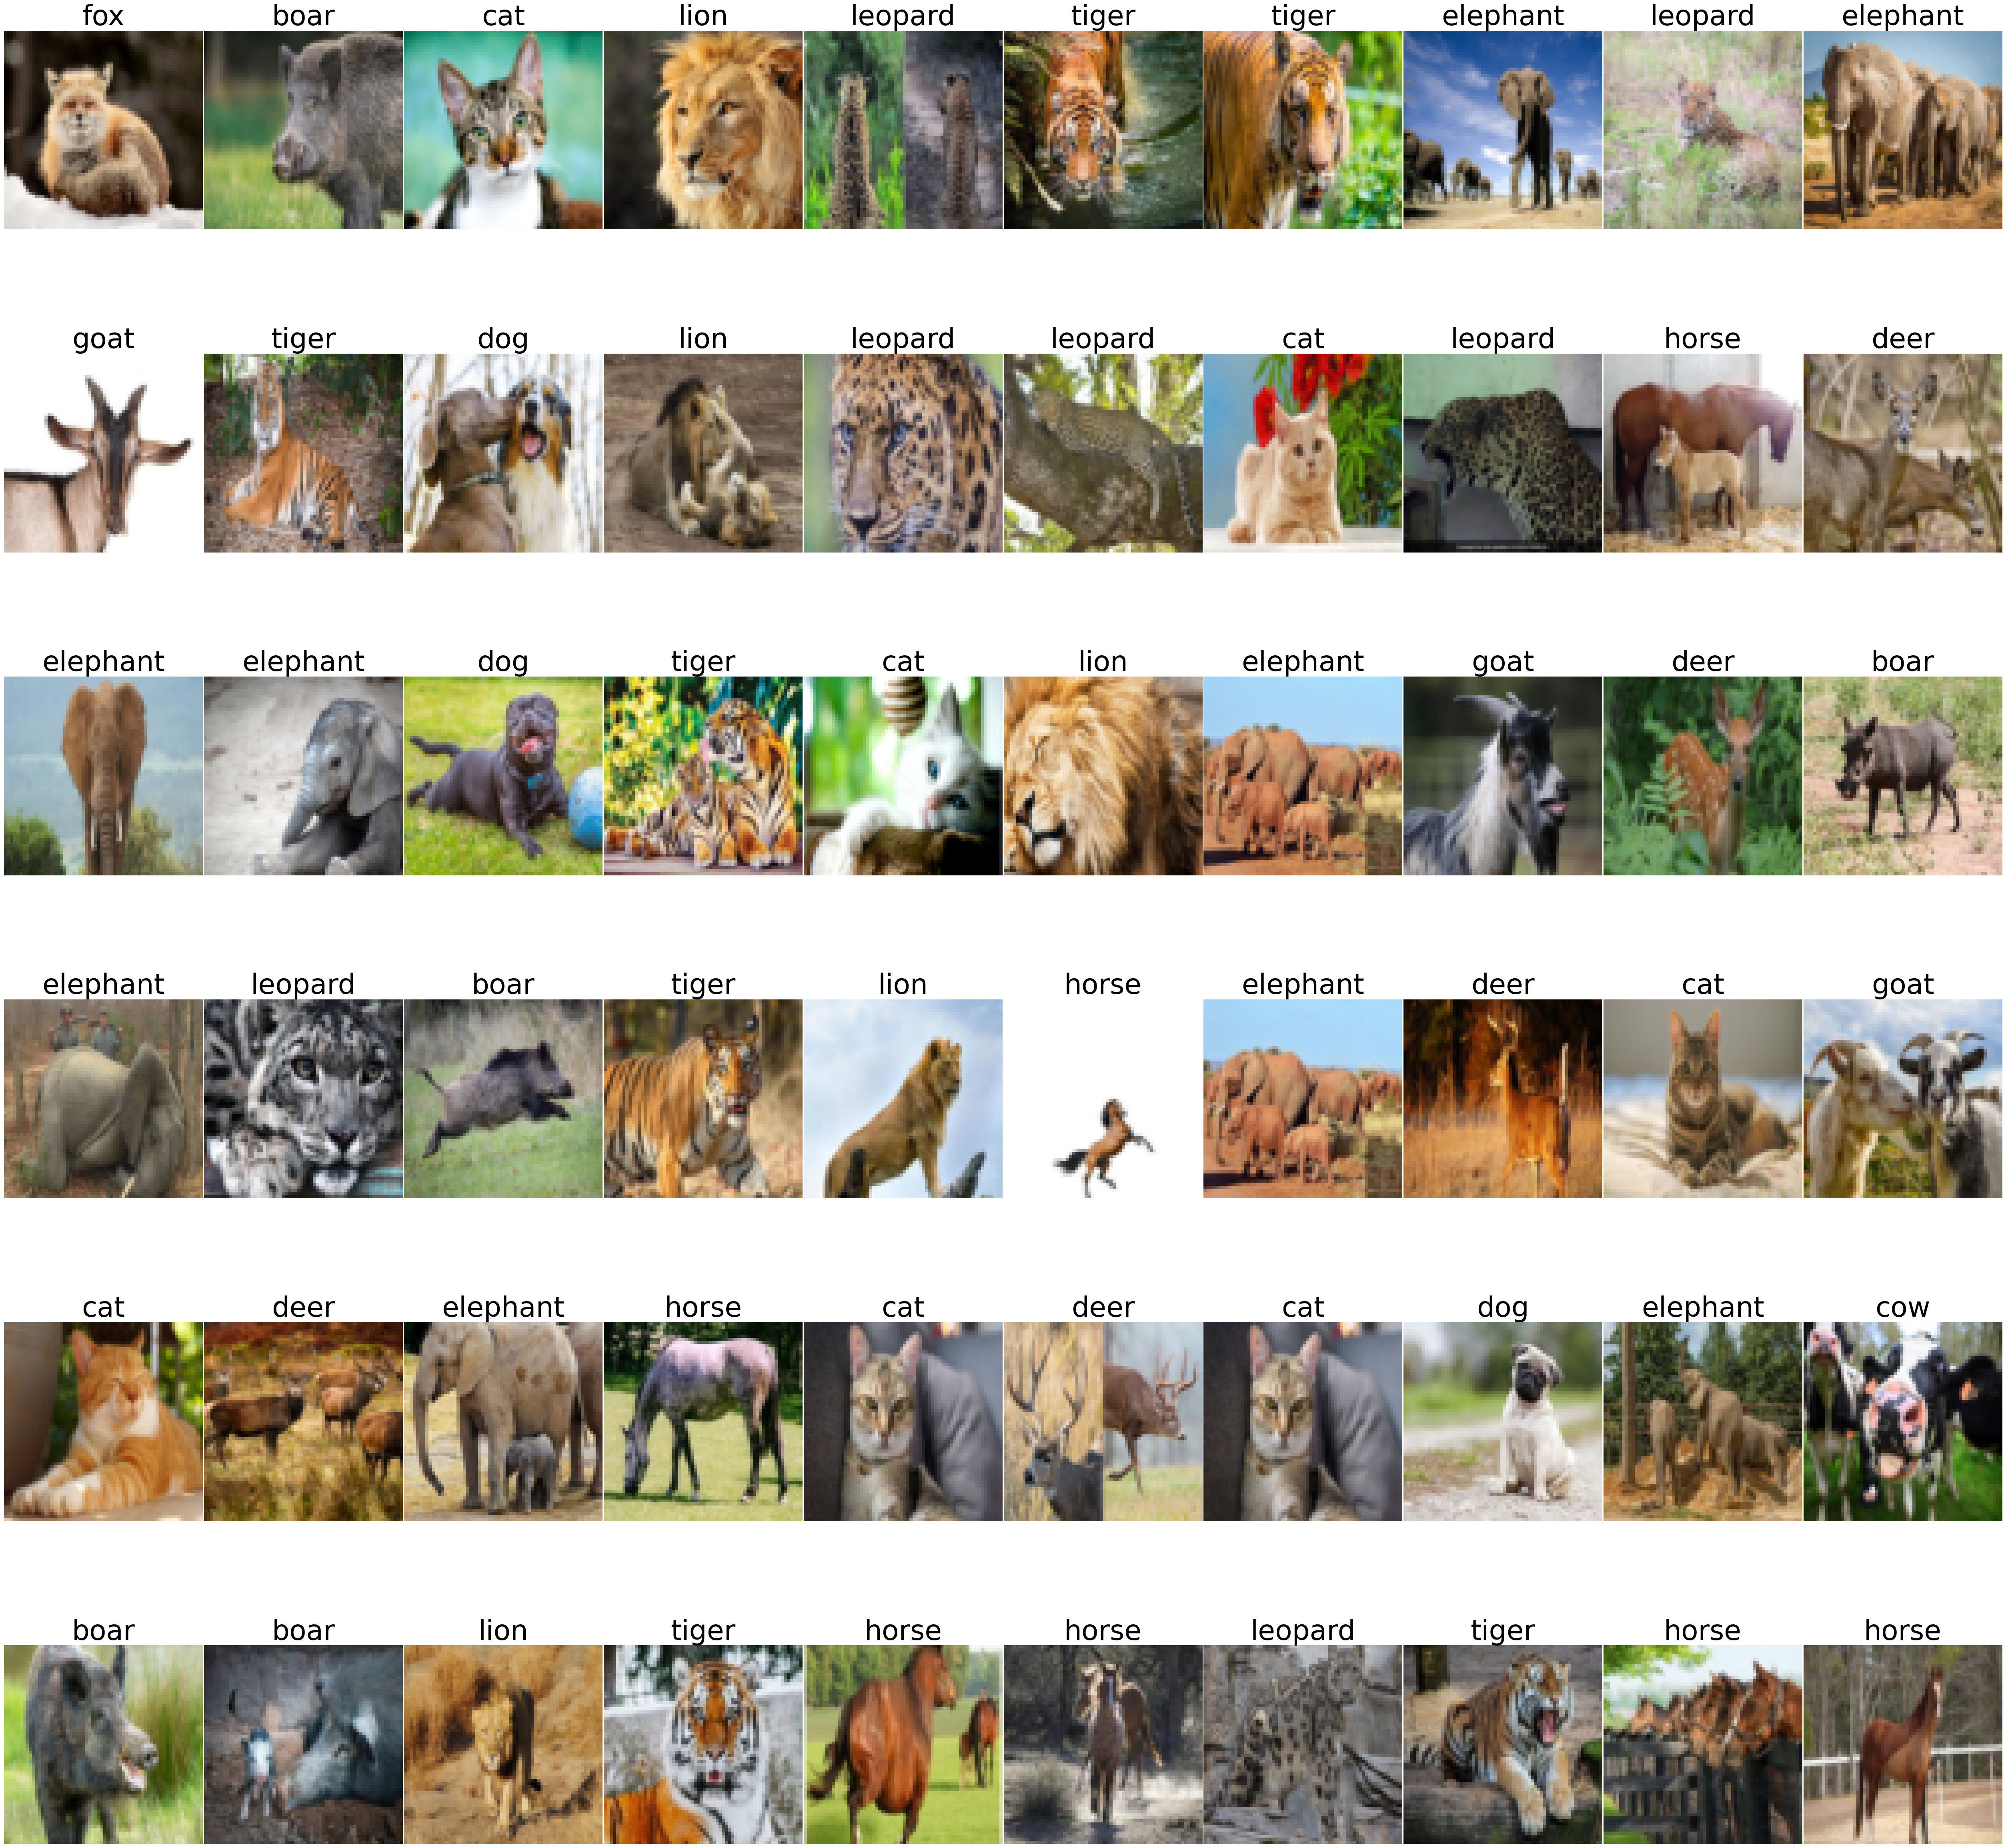

59


In [9]:
import matplotlib.pyplot as plt
import numpy as np


for input,label in trainloader:
  input = input.detach().cpu().numpy()

  label  = label.detach().cpu().numpy()

  fig,axes = plt.subplots(6,10,figsize=(50,50))
  axes = axes.flatten()

  for i in range(batch_size):

    img = input[i].transpose(1, 2, 0)
    img = (img*0.5)+0.5
    #img = np.squeeze(img)
    axe = axes[i]
    axe.imshow(img)
    axe.set_title(f'{class_map[label[i]]}' , fontsize = 50)
    axe.axis('off')
  plt.tight_layout(pad=0.2)
  plt.show()
  print(i)
  break



In [10]:
import torch.nn as nn
import torch
class CNN_NET(nn.Module):
  def __init__(self,*args):
    super(CNN_NET,self).__init__()
    self.main = nn.Sequential(

        nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size=5,padding=0,stride=1,bias=False),
                nn.LeakyReLU(0.2,inplace=True),
                nn.MaxPool2d(kernel_size=2,stride=1,padding=0),

                nn.Conv2d(in_channels = 64, out_channels = 64*2, kernel_size=5,padding=0,stride=1,bias=False),
                nn.LeakyReLU(0.2,inplace=True),
                nn.MaxPool2d(kernel_size=3,stride=1,padding=0),


                nn.Conv2d(in_channels = 64*2, out_channels = 64*4, kernel_size=5,padding=0,stride=1,bias=False),
                nn.BatchNorm2d(64*4),
                nn.LeakyReLU(0.2,inplace = True),
                nn.Dropout2d(0.3),
                nn.Conv2d(in_channels=64*4, out_channels=64*4, kernel_size=5,padding = 0,stride = 1,bias=False),
                nn.BatchNorm2d(64*4),
                nn.LeakyReLU(0.2,inplace=True),
                nn.Dropout2d(0.3),
                nn.MaxPool2d(kernel_size=3,stride=2,padding=1),

                nn.Conv2d(in_channels = 64*4, out_channels = 64*8, kernel_size=3,padding=1,stride=1,bias=False),
                nn.BatchNorm2d(64*8),
                nn.LeakyReLU(0.2,inplace = True),
                nn.Dropout2d(0.35),
                nn.Conv2d(in_channels=64*8, out_channels=64*8, kernel_size=3,padding = 1,stride = 1,bias=False),
                nn.BatchNorm2d(64*8),
                nn.LeakyReLU(0.2,inplace=True),
                nn.Dropout2d(0.35),
                nn.MaxPool2d(kernel_size=2,stride=4,padding=1),


                nn.Conv2d(in_channels = 64*8, out_channels = 64*16, kernel_size=3,padding=1,stride=1,bias=False),
                nn.BatchNorm2d(64*16),

                nn.LeakyReLU(0.2,inplace = True),
                nn.Dropout2d(0.425),


                nn.Conv2d(in_channels=64*16, out_channels=64*16, kernel_size=3,padding = 1,stride = 1,bias=False),
                nn.BatchNorm2d(64*16),
                nn.LeakyReLU(0.2,inplace=True),
                nn.Dropout2d(0.45),
                nn.MaxPool2d(kernel_size=2,stride=4,padding=1),
                nn.Flatten(),
                nn.Linear(1024*2*2,1000,bias=False),
                nn.LeakyReLU(0.2,inplace=True),

                nn.Linear(1000,12,bias=True),
                nn.LeakyReLU(0.2,inplace=True),


                              )
  def forward(self,input):
    return self.main(input)


sample_input = torch.rand((1,3,64,64))
neural_net = CNN_NET()
print(neural_net)
sample_output = neural_net(sample_input)


CNN_NET(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): Dropout2d(p=0.3, inplace=False)
    (10): Conv2d(256, 256, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negative_slope=0.2, inplace=True)
    (13): Dropout2d(p=0.3, inplace=False)
    (14): MaxPool2d(kernel_size=3, 

In [11]:
def save_checkpoint(epoch,model,optimizer,loss):
  checkpoint = {
      "epoch":epoch,
      "model_state":model.state_dict(),
      "optimizer_state":optimizer.state_dict(),
      "loss":loss
  }
  torch.save(checkpoint,"cnn_model.pth")
  print("checkpoint saved at epoch",epoch)

def load_checkpoint(checkpoint_file):
  print("loading checkpoint")
  checkpoint = torch.load(checkpoint_file)
  neural_net.load_state_dict(checkpoint["model_state"])
  print("model state dict loaded!")
  optimizer.load_state_dict(checkpoint["optimizer_state"])
  print("optimizer state dict loaded")
  loss = checkpoint["loss"]
  epoch = checkpoint["epoch"]
  return loss,epoch

In [12]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
neural_net = CNN_NET().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(neural_net.parameters(), lr=0.002)

num_epochs = 100
start_epoch = 0
curr_loss = 0
epoch_loss = []
epoch_accuracy = []



In [67]:
resume = True
if resume:
  curr_loss,start_epoch = load_checkpoint("cnn_model.pth")
  print("resuming from epoch",start_epoch)

try:
  for epoch in range(start_epoch,num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    neural_net.train()

    for i, data in enumerate(trainloader, 0):
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      optimizer.zero_grad()

      outputs = neural_net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      batch_loss = loss.item()
      _, predicted = torch.max(outputs.data, 1)
      batch_total_predictions = labels.size(0)
      batch_correct_predictions = (predicted == labels).sum().item()

      running_loss += batch_loss
      total_predictions += batch_total_predictions
      correct_predictions += batch_correct_predictions

      if (i + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Iteration [{i+1}/{len(trainloader)}], Average Loss: {(running_loss/i+1):.2f}, Accuracy: {(correct_predictions / total_predictions) * 100:.2f}%")

        for j in range(min(len(inputs), 5)):  # Print for a few samples
            predicted_class = predicted[j].item()
            original_class = labels[j].item()
            print(f"  Sample {j+1}: Predicted Class: {class_map[predicted_class]}, Original Class: {class_map[original_class]}")



    save_checkpoint(epoch,neural_net,optimizer,running_loss/len(trainloader))
    print("checkpoint saved at epoch",epoch)
    epoch_loss.append(running_loss / len(trainloader))
    epoch_accuracy.append((correct_predictions / total_predictions) * 100)

    # Print epoch-level loss and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Avg Epoch Loss: {running_loss / len(trainloader):.2f}, Accuracy: {(correct_predictions / total_predictions) * 100:.2f}%")
except(KeyboardInterrupt):
  print("Training Interrupted ,Saving checkpoint")
  save_checkpoint(epoch,neural_net,optimizer,running_loss/len(trainloader))
  print("checkpoint saved at epoch",epoch)

print('Finished Training')

loading checkpoint
model state dict loaded!
optimizer state dict loaded
resuming from epoch 1


<ipython-input-59-7196badfa6dd>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_file)


Epoch [2/100], Iteration [5/13], Average Loss: 4.28, Accuracy: 11.67%
  Sample 1: Predicted Class: boar, Original Class: lion
  Sample 2: Predicted Class: boar, Original Class: fox
  Sample 3: Predicted Class: boar, Original Class: boar
  Sample 4: Predicted Class: boar, Original Class: boar
  Sample 5: Predicted Class: fox, Original Class: goat
Epoch [2/100], Iteration [10/13], Average Loss: 3.87, Accuracy: 11.33%
  Sample 1: Predicted Class: leopard, Original Class: fox
  Sample 2: Predicted Class: leopard, Original Class: fox
  Sample 3: Predicted Class: leopard, Original Class: lion
  Sample 4: Predicted Class: leopard, Original Class: lion
  Sample 5: Predicted Class: leopard, Original Class: lion
checkpoint saved at epoch 1
checkpoint saved at epoch 1
Epoch [2/100], Avg Epoch Loss: 2.58, Accuracy: 10.85%
Epoch [3/100], Iteration [5/13], Average Loss: 4.10, Accuracy: 11.33%
  Sample 1: Predicted Class: elephant, Original Class: deer
  Sample 2: Predicted Class: dog, Original Class

In [31]:
Cnn_Detection = CNN_NET()
Cnn_Detection.load_state_dict(torch.load("/content/drive/MyDrive/cnn_model.pth")["model_state"])
Cnn_Detection.eval()

for input,label in trainloader:
  output = Cnn_Detection(input)
  _,predicted= torch.max(output,1)

  for i in range(batch_size):
    print(class_map[predicted.detach().numpy()[i]],end=" ")
    print(class_map[label.detach().numpy()[i]])
  break

<ipython-input-31-1adc264fbc6d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Cnn_Detection.load_state_dict(torch.load("/content/drive/MyDrive/cnn_model.pth")["model_stat

leopard leopard
lion lion
lion lion
deer deer
dog dog
dog dog
goat goat
elephant elephant
cat cat
cow cow
fox fox
cow cow
cat cat
boar boar
elephant elephant
lion lion
tiger tiger
leopard leopard
cow cow
horse horse
dog dog
cat cat
tiger tiger
tiger tiger
tiger tiger
cow cow
goat goat
goat goat
fox fox
tiger tiger
boar boar
leopard leopard
lion lion
cow cow
dog dog
leopard leopard
tiger tiger
cow cow
boar boar
deer deer
lion lion
fox fox
deer deer
tiger tiger
dog dog
elephant elephant
elephant elephant
deer deer
deer deer
lion lion
goat goat
elephant elephant
goat goat
tiger tiger
dog dog
tiger tiger
fox fox
dog dog
boar boar
goat goat
